# 12. 문자를 읽을 수 있는 딥러닝

12-9. 프로젝트 : 다양한 OCR모델 비교하기

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을 것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

프로젝트를 시작하기 전에 주요 라이브러리 버전을 살펴보죠.

In [26]:
# 라이브러리 입력하기

import keras_ocr
import pytesseract
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from pytesseract import Output

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

0.8.8
0.3.8
Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


# Step1. 검증용 데이터셋 준비
***
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

# Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
***
위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.


# Step3. 테스트 결과 정리
***
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

# Step4. 결과 분석과 결론 제시
***
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

# 1. keras-ocr 모델 



In [24]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://post-phinf.pstatic.net/MjAyMTAxMDRfODMg/MDAxNjA5NzQwNzQ2MDA4.YlHuUmXWNlkLsBmxJbiCc5jF16DsGayxuaLwDkDwhR4g.t0rHdTVoEovOZKgBmo2Bw8D2xrGJF8JwIYRnI9QNyBcg.JPEG/10.%EA%B0%90%EC%84%B1%EC%A0%81%EC%9D%B8%EC%98%81%EC%96%B4%EB%8B%A8%EC%96%B4_%284%29.JPG?type=w1200',
  'https://en.pimg.jp/014/824/311/1/14824311.jpg',
  'https://en.pimg.jp/066/857/063/1/66857063.jpg'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

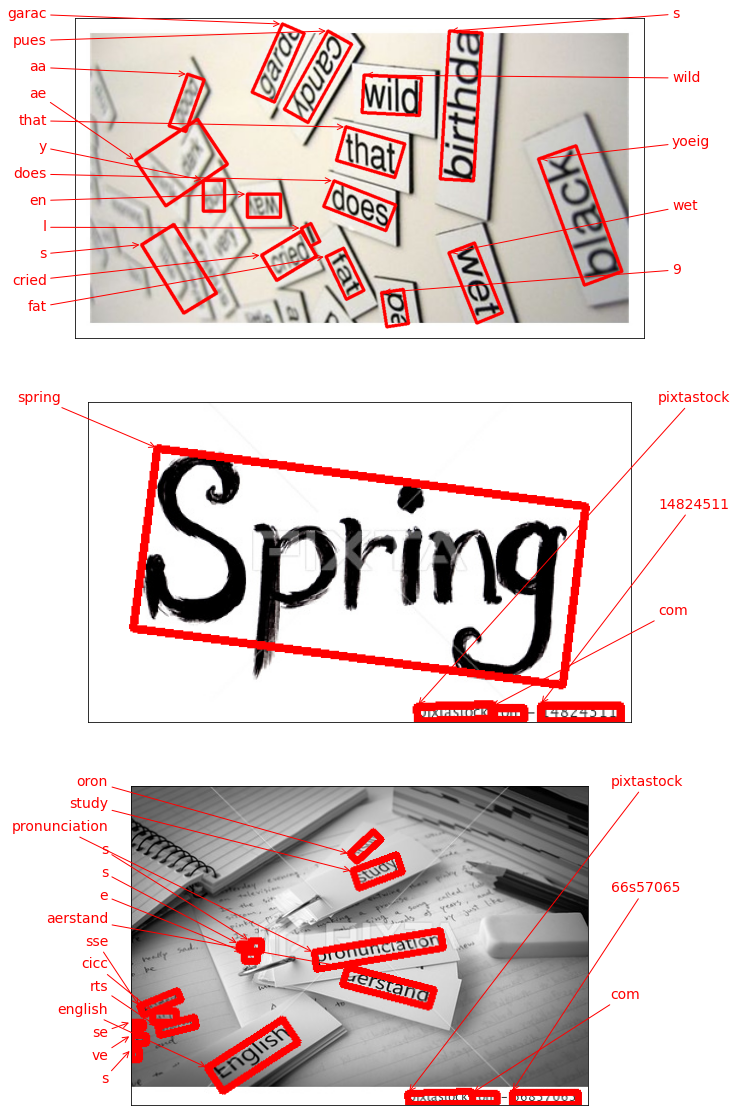

In [25]:
# 시각화 하기
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 2. 테서랙트 모델


# 테서랙트로 문자 검출하고 이미지 자르기(detection)

In [33]:

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png


# 테서랙트로 잘린 이미지에서 단어 인식하기

In [34]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


| is

ROADS

LEAD TO

BE AUTIFUL

DESTIN

A TIONS

BS


Done


# Google OCR API


# api 사용 테스트

In [36]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [42]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS


os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.jpg'  

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

E0616 16:05:59.638183333      31 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


-rw-r--r-- 1 root root 2322 Jun 16 03:05 /aiffel/aiffel/ocr_python/my_google_api_key.json
Texts:

"▬▬
DIFFICULT
LEAD TO
ROADS
BEAUTIFUL
DESTIN A TIONS
T
M
M ☐
L
P
■
▬
M
M
M
·
☐ U
C
M
L
M
■
U
■
M
U
U
M
M
C
☐
M B
B
M"

"▬▬"

"DIFFICULT"

"LEAD"

"TO"

"ROADS"

"BEAUTIFUL"

"DESTIN"

"A"

"TIONS"

"T"

"M"

"M"

"☐"

"L"

"P"

"■"

"▬"

"M"

"M"

"M"

"·"

"☐"

"U"

"C"

"M"

"L"

"M"

"■"

"U"

"■"

"M"

"U"

"U"

"M"

"M"

"C"

"☐"

"M"

"B"

"B"

"M"
bounds: (1267,2272),(1267,2292),(1253,2292),(1253,2272)


# 결과 분석 및 결론

 keras-ocr,테서랙트,Google OCR를 차례대로 모델을 적용시켜본 결과, Google OCR 모델이 가장 인식을 잘하는 것 같다. 이유는 같은 이미지를 사용하여 비교하였을때 가장 많은 문자를 인식하였다.   
하지만 문자가 각도가 있거나 필기체가 다를때와 같이 변수들이 많다면 인식이 잘 안되는 문제가 있다. 그리고 영어는 잘 인식하지만 한글을 인식 못하는 경우도 있다.  
또한 이미지의 크기에 따라서 엉뚱한 문자로 인식하는 경향도 보인다.  


# 회고
***
문자를 읽을 수 있는 딥러닝 실습을 통해서 기계가 문자를 읽는 과정들을 배웠다.  
크게 보면 2가지로 나뉜다.  
이미지에서 문자가 있다는 것을 감지하는 과정. 즉 문자를 바운딩 박스로 검출한다.  
그리고 그 문자를 인식해서 읽어내는 과정이다.  
문자를 읽어내기 위해 3가지 모델을 사용하였는데, 모델마다 인식하는 방법이 다르다.  
이러한 기술들이    
이미 휴대폰의 카메라를 이용하여 카드번호를 스캔하거나, 우체국에서 우편번호를 추출하는 기능 같이 어느정도 서비스화가 되고있다.  
이 기술을 잘 활용한다면 실제 산업에서 많은 부분이 쓰일 것이라고 예상된다. 